<a href="https://colab.research.google.com/github/riyabhatnagar021/Image_brightness_detection/blob/master/img_bright.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import imutils

# Place the image whose brightness is to be checked


In [0]:
img = cv2.imread('apple.jpg')

In [0]:
img = imutils.resize(img, width=1000,height=1000)

In [0]:
img_dot = img

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)

#-----Finding average lightness level in image by fixing some points--------
y,x,z = img.shape #height, width of image



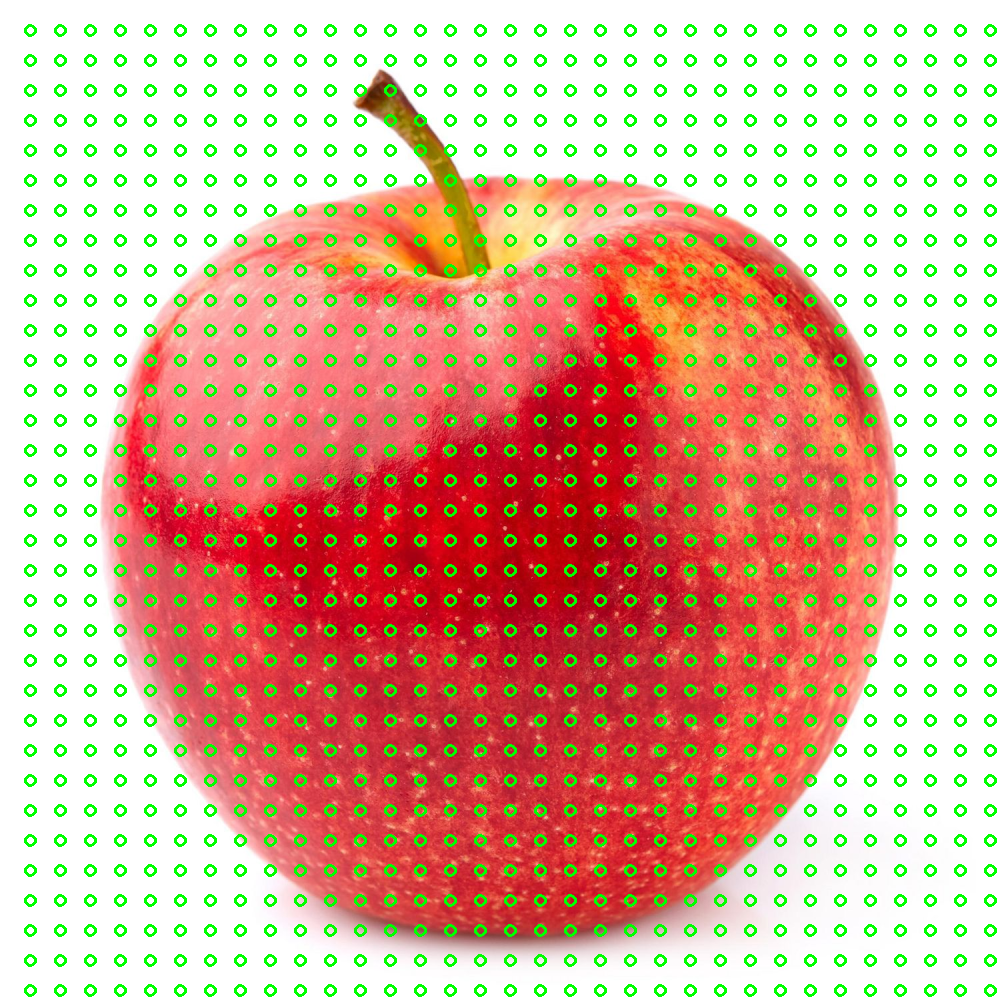

In [69]:
#Now we will decide some dynamic points on image for checking light intensity
l_blur = cv2.GaussianBlur(l, (11, 11), 5)
maxval = []

count_percent = 3 #percent of total image
count_percent = count_percent/100

row_percent = int(count_percent*x) #1% of total pixels widthwise
column_percent = int(count_percent*y) #1% of total pizel height wise

for i in range(1,x-1):
	if i%row_percent == 0:
    
		for j in range(1, y-1):
			if j%column_percent == 0:
        
				pix_cord = (i,j)

				cv2.circle(img_dot, (int(i), int(j)), 5, (0, 255, 0), 2)
				img_segment = l_blur[i:i+3, j:j+3]
        
				(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(img_segment)
        
				maxval.append(maxVal)

avg_maxval = round(sum(maxval) / len(maxval))

from google.colab.patches import cv2_imshow

cv2_imshow(img_dot)
cv2.waitKey(0)
print()

# Rescaling to a range of 0-10


In [0]:
OldMax=255
OldMin=0
NewMax=10
NewMin=0
OldValue=avg_maxval
OldRange = (OldMax - OldMin)  
NewRange = (NewMax - NewMin)  
NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin


# Score



In [71]:
print('Brightness: {}'.format(NewValue))

Brightness: 7.647058823529412
